In [1]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch

# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Operating System Interaction
import os
import sys

# Machine Learning Frameworks
import torch
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader


# Model Building and Initialization
import torch.nn as nn
from torch.nn.init import kaiming_normal_

# Data Loading and Dataset Handling
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, Subset
from PIL import Image
import json

# Cross-Validation and Metrics
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score, confusion_matrix
from scipy.special import expit as sigmoid

# Visualization and Display
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
import matplotlib.patches as patches

from IPython.display import HTML
from astropy.visualization import ImageNormalize, SqrtStretch
import seaborn as sns
import sunpy.visualization.colormaps as cm

# Miscellaneous
import random
from tqdm import tqdm

Format of input file

In [2]:
import json

data = {
    "categories": [ #id 1 will be changed from airplane to jet 
        {"id": 1, "name": "airplane", "encode_name": "n02691156"},
        {"id": 2, "name": "antelope", "encode_name": "n02419796"},
        {"id": 3, "name": "bear", "encode_name": "n02131653"},
        {"id": 4, "name": "bicycle", "encode_name": "n02834778"},
        {"id": 5, "name": "bird", "encode_name": "n01503061"},
        {"id": 6, "name": "bus", "encode_name": "n02924116"},
        {"id": 7, "name": "car", "encode_name": "n02958343"},
        {"id": 8, "name": "cattle", "encode_name": "n02402425"},
        {"id": 9, "name": "dog", "encode_name": "n02084071"},
        {"id": 10, "name": "domestic_cat", "encode_name": "n02121808"},
        {"id": 11, "name": "elephant", "encode_name": "n02503517"},
        {"id": 12, "name": "fox", "encode_name": "n02118333"},
        {"id": 13, "name": "giant_panda", "encode_name": "n02510455"},
        {"id": 14, "name": "hamster", "encode_name": "n02342885"},
        {"id": 15, "name": "horse", "encode_name": "n02374451"},
        {"id": 16, "name": "lion", "encode_name": "n02129165"},
        {"id": 17, "name": "lizard", "encode_name": "n01674464"},
        {"id": 18, "name": "monkey", "encode_name": "n02484322"},
        {"id": 19, "name": "motorcycle", "encode_name": "n03790512"},
        {"id": 20, "name": "rabbit", "encode_name": "n02324045"},
        {"id": 21, "name": "red_panda", "encode_name": "n02509815"},
        {"id": 22, "name": "sheep", "encode_name": "n02411705"},
        {"id": 23, "name": "snake", "encode_name": "n01726692"},
        {"id": 24, "name": "squirrel", "encode_name": "n02355227"},
        {"id": 25, "name": "tiger", "encode_name": "n02129604"},
        {"id": 26, "name": "train", "encode_name": "n04468005"},
        {"id": 27, "name": "turtle", "encode_name": "n01662784"},
        {"id": 28, "name": "watercraft", "encode_name": "n04530566"},
        {"id": 29, "name": "whale", "encode_name": "n02062744"},
        {"id": 30, "name": "zebra", "encode_name": "n02391049"}
    ],

    "images":[
        {"file_name" : "DET/train/ILSVRC2014_train_0000/ILSVRC2014_train_00000663.JPEG", 
         "height": 166, 
         "width": 166, 
         "id": 1, #starting from 1
         "frame_id": -1,  #starting from 0 and reseting when changing video
         "video_id": 1, 
         "is_vid_train_frame": True}
    ],#all files (images)

    "annotations" :[
        {"id": 1, #one id per image even if it's in the same vid
         "video_id": 1, #goes up to the number of videos 
         "image_id": 1, 
         "category_id": 1, #will always be 1 as the jets will be classified as 1 
         "instance_id": 1, 
         "bbox": [1, 90, 496, 271], 
         "area": 134416, 
         "iscrowd": False, 
         "occluded": False, 
         "generated": False}
    ],

    "videos":[
        {"id": 1,
        "name": "VID/train/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00000000", 
        "vid_train_frames": [9, 29, 49, 69, 89, 109, 129, 149, 169, 189, 209, 229, 249, 269, 289]} #take all frames maybe for training
    ]   
}

Take all labeled events and transform them into JET_train_eventx/imagex.JPG

In [4]:
import os

def list_files_in_folder(folder_path):
    """
    List all files in a folder in ascending order.
    
    Args:
    - folder_path: The path to the folder
    
    Returns:
    - file_names: A list of file names in the folder, sorted in ascending order
    """
    file_names = []
    for file_name in sorted(os.listdir(folder_path), key=lambda x: int(os.path.splitext(x)[0])):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_names.append(file_name)
    return file_names

# Example usage:
folder_path = "../../../../jet_box_sophie/bbox_events_jets/000"
file_names = list_files_in_folder(folder_path)
print(file_names)
print(len(file_names))


['000_000.csv', '000_001.csv', '000_002.csv', '000_003.csv', '000_004.csv', '000_005.csv', '000_006.csv', '000_007.csv', '000_008.csv', '000_009.csv', '000_010.csv', '000_011.csv', '000_012.csv', '000_013.csv', '000_014.csv', '000_015.csv', '000_016.csv', '000_017.csv', '000_018.csv', '000_019.csv', '000_020.csv', '000_021.csv', '000_022.csv', '000_023.csv', '000_024.csv', '000_025.csv', '000_026.csv', '000_027.csv', '000_028.csv', '000_029.csv', '000_030.csv', '000_031.csv', '000_032.csv', '000_033.csv', '000_034.csv', '000_035.csv', '000_036.csv', '000_037.csv', '000_038.csv', '000_039.csv', '000_040.csv', '000_041.csv', '000_042.csv', '000_043.csv', '000_044.csv', '000_045.csv', '000_046.csv', '000_047.csv', '000_048.csv', '000_049.csv', '000_050.csv', '000_051.csv', '000_052.csv', '000_053.csv', '000_054.csv', '000_055.csv', '000_056.csv', '000_057.csv', '000_058.csv', '000_059.csv', '000_060.csv', '000_061.csv', '000_062.csv', '000_063.csv', '000_064.csv', '000_065.csv', '000_066.

Creating a folder for each event in the video dataset

Take All events, split the video into each JPG frame and save it in the new folder paths

In [81]:
def array_to_rgb_jpeg(array, cmap, output_path):
    
    vmin, vmax = np.percentile(array, [1, 99.9])

    # Normalize the array
    norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())
    
    # Apply the colormap to the array to get RGB representation
    cmap_image = plt.get_cmap(cmap)(norm(array))[:, :, :3]  # [:, :, :3] to remove alpha channel
    
    # Convert the RGB array to a PIL Image
    img = Image.fromarray((cmap_image * 255).astype(np.uint8))

    # Save the image as JPEG
    img.save(output_path, "JPEG", quality=100)

In [82]:
import numpy as np
import PIL

for file in file_names:
    print(file)
    new_folder_path="./Data/VID/" +f"JET_train_{str(file[:-4]).zfill(3)}"
    os.makedirs(new_folder_path, exist_ok=True)

    vid=np.load(folder_path+f"/{str(file[:-4]).zfill(3)}")
    vid=vid["arr_0"]
    if vid.shape != (166,166,30):
        print(f"ERROR SHAPE WITH FILE : {str(file[:-4]).zfill(3)}, shape = {vid.shape}")
    else:
        for i in range(30):
            array_to_rgb_jpeg(vid[:,:,i], cmap="sdoaia304", output_path=f"{new_folder_path}"+f"/{str(i).zfill(2)}.JPEG")

0.npz
1.npz
2.npz
3.npz
4.npz
5.npz
6.npz
7.npz
9.npz
10.npz
11.npz
12.npz
13.npz
14.npz
15.npz
16.npz
17.npz
18.npz
19.npz
20.npz
21.npz
22.npz
23.npz
24.npz
25.npz
26.npz
29.npz
31.npz
32.npz
33.npz
34.npz
35.npz
36.npz
37.npz
38.npz
39.npz
40.npz
41.npz
42.npz
43.npz
44.npz
45.npz
46.npz
47.npz
48.npz
49.npz
50.npz
51.npz
52.npz
53.npz
54.npz
55.npz
56.npz
57.npz
58.npz
59.npz
60.npz
61.npz
62.npz
67.npz
68.npz
70.npz
71.npz
72.npz
73.npz
74.npz
75.npz
76.npz
77.npz
78.npz
79.npz
80.npz
81.npz
82.npz
83.npz
84.npz
85.npz
86.npz
87.npz
88.npz
89.npz
90.npz
91.npz
92.npz
96.npz
97.npz
98.npz
99.npz
100.npz
101.npz
102.npz
103.npz
104.npz
105.npz
106.npz
107.npz
108.npz
109.npz
110.npz
111.npz
112.npz
114.npz
115.npz
116.npz
117.npz
118.npz
119.npz
120.npz
121.npz
122.npz
123.npz
124.npz
125.npz
126.npz
127.npz
128.npz
129.npz
130.npz
131.npz
132.npz
133.npz
134.npz
135.npz
136.npz
137.npz
138.npz
139.npz
140.npz
141.npz
143.npz
144.npz
145.npz
146.npz
147.npz
148.npz
149.npz
150.npz
1

In [83]:
def plot_img(img):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)

    vmin, vmax = np.percentile(img, [1, 99.9])
    norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())


    a.imshow(img, cmap='sdoaia304', norm=norm)
    plt.show()

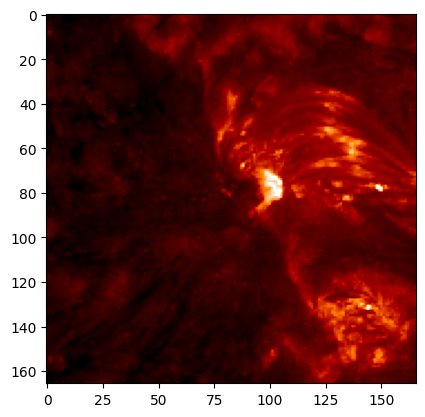

In [84]:
plot_img(vid[:,:,0])

Creating Json file

In [85]:
import json

data = {
    "categories": [ #id 1 will be changed from airplane to jet 
        {"id": 1, "name": "jet", "encode_name": "n02691156"},
        {"id": 2, "name": "antelope", "encode_name": "n02419796"},
        {"id": 3, "name": "bear", "encode_name": "n02131653"},
        {"id": 4, "name": "bicycle", "encode_name": "n02834778"},
        {"id": 5, "name": "bird", "encode_name": "n01503061"},
        {"id": 6, "name": "bus", "encode_name": "n02924116"},
        {"id": 7, "name": "car", "encode_name": "n02958343"},
        {"id": 8, "name": "cattle", "encode_name": "n02402425"},
        {"id": 9, "name": "dog", "encode_name": "n02084071"},
        {"id": 10, "name": "domestic_cat", "encode_name": "n02121808"},
        {"id": 11, "name": "elephant", "encode_name": "n02503517"},
        {"id": 12, "name": "fox", "encode_name": "n02118333"},
        {"id": 13, "name": "giant_panda", "encode_name": "n02510455"},
        {"id": 14, "name": "hamster", "encode_name": "n02342885"},
        {"id": 15, "name": "horse", "encode_name": "n02374451"},
        {"id": 16, "name": "lion", "encode_name": "n02129165"},
        {"id": 17, "name": "lizard", "encode_name": "n01674464"},
        {"id": 18, "name": "monkey", "encode_name": "n02484322"},
        {"id": 19, "name": "motorcycle", "encode_name": "n03790512"},
        {"id": 20, "name": "rabbit", "encode_name": "n02324045"},
        {"id": 21, "name": "red_panda", "encode_name": "n02509815"},
        {"id": 22, "name": "sheep", "encode_name": "n02411705"},
        {"id": 23, "name": "snake", "encode_name": "n01726692"},
        {"id": 24, "name": "squirrel", "encode_name": "n02355227"},
        {"id": 25, "name": "tiger", "encode_name": "n02129604"},
        {"id": 26, "name": "train", "encode_name": "n04468005"},
        {"id": 27, "name": "turtle", "encode_name": "n01662784"},
        {"id": 28, "name": "watercraft", "encode_name": "n04530566"},
        {"id": 29, "name": "whale", "encode_name": "n02062744"},
        {"id": 30, "name": "zebra", "encode_name": "n02391049"}
    ],

    "images":[
        {"file_name" : "DET/train/ILSVRC2014_train_0000/ILSVRC2014_train_00000663.JPEG", 
         "height": 166, 
         "width": 166, 
         "id": 1, #starting from 1
         "frame_id": -1,  #starting from 0 and reseting when changing video
         "video_id": 1, 
         "is_vid_train_frame": True}
    ],#all files (images)

    "annotations" :[
        {"id": 1, #one id per image even if it's in the same vid
         "video_id": 1, #goes up to the number of videos 
         "image_id": 1, 
         "category_id": 1, #will always be 1 as the jets will be classified as 1 
         "instance_id": 1, 
         "bbox": [1, 90, 496, 271], 
         "area": 134416, 
         "iscrowd": False, 
         "occluded": False, 
         "generated": False}
    ],

    "videos":[
        {"id": 1,
        "name": "VID/train/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00000000", 
        "vid_train_frames": [9, 29, 49, 69, 89, 109, 129, 149, 169, 189, 209, 229, 249, 269, 289]} #take all frames maybe for training
    ]   
}

In [14]:
def generate_image_data(folder_path,data):

    video_id = len(data["videos"]) + 1 #everytime we change folder video id is increased by one
    vid_info = {
                "id": video_id,
                "name":folder_path[-13:],
                "vid_train_frames":[i for i in range(30)]
            }

    data["videos"].append(vid_info)

    frame_id=0

    for filename in os.listdir(folder_path):

        if filename.endswith(".JPEG"):
            image_id = len(data["images"]) + 1
            annot_id = len(data["annotations"]) + 1
            image_path = os.path.join(folder_path, filename)
            

            image_info = {
                "file_name": image_path[11:],
                "height": 166,
                "width": 166,
                "id": image_id,
                "frame_id": frame_id,
                "video_id": video_id,
                "is_vid_train_frame": True
            }
            data["images"].append(image_info)

            bbox_im=np.load(f"../../../../data_boxes/events/{folder_path[-3:]}.npy") 
           
            for bbox in bbox_im: #If multiple bbox for one image
                bbox=torch.tensor(bbox).view(1,4)
                annotation_info = {
                    "id": annot_id,
                    "video_id": video_id,
                    "image_id": image_id,
                    "category_id": 1,
                    "instance_id": 1,
                    "bbox": bbox.tolist()[0],                               
                    "area": torchvision.ops.box_area(bbox).item(), #in [x1,y1,x2,y2]
                    "iscrowd": False,
                    "occluded": False,
                    "generated": False
                }
                data["annotations"].append(annotation_info)
                annot_id+=1
            frame_id+=1
            
    return data
# Function to generate data for each folder in a directory
def generate_folder_data(root_folder, data):
    for folder_name in os.listdir(root_folder):#All folder in folder path (VID)
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):
            data=generate_image_data(folder_path,data)



data = {
    "categories": [ #id 1 will be changed from airplane to jet 
        {"id": 1, "name": "jet", "encode_name": "n02691156"},
        {"id": 2, "name": "antelope", "encode_name": "n02419796"},
        {"id": 3, "name": "bear", "encode_name": "n02131653"},
        {"id": 4, "name": "bicycle", "encode_name": "n02834778"},
        {"id": 5, "name": "bird", "encode_name": "n01503061"},
        {"id": 6, "name": "bus", "encode_name": "n02924116"},
        {"id": 7, "name": "car", "encode_name": "n02958343"},
        {"id": 8, "name": "cattle", "encode_name": "n02402425"},
        {"id": 9, "name": "dog", "encode_name": "n02084071"},
        {"id": 10, "name": "domestic_cat", "encode_name": "n02121808"},
        {"id": 11, "name": "elephant", "encode_name": "n02503517"},
        {"id": 12, "name": "fox", "encode_name": "n02118333"},
        {"id": 13, "name": "giant_panda", "encode_name": "n02510455"},
        {"id": 14, "name": "hamster", "encode_name": "n02342885"},
        {"id": 15, "name": "horse", "encode_name": "n02374451"},
        {"id": 16, "name": "lion", "encode_name": "n02129165"},
        {"id": 17, "name": "lizard", "encode_name": "n01674464"},
        {"id": 18, "name": "monkey", "encode_name": "n02484322"},
        {"id": 19, "name": "motorcycle", "encode_name": "n03790512"},
        {"id": 20, "name": "rabbit", "encode_name": "n02324045"},
        {"id": 21, "name": "red_panda", "encode_name": "n02509815"},
        {"id": 22, "name": "sheep", "encode_name": "n02411705"},
        {"id": 23, "name": "snake", "encode_name": "n01726692"},
        {"id": 24, "name": "squirrel", "encode_name": "n02355227"},
        {"id": 25, "name": "tiger", "encode_name": "n02129604"},
        {"id": 26, "name": "train", "encode_name": "n04468005"},
        {"id": 27, "name": "turtle", "encode_name": "n01662784"},
        {"id": 28, "name": "watercraft", "encode_name": "n04530566"},
        {"id": 29, "name": "whale", "encode_name": "n02062744"},
        {"id": 30, "name": "zebra", "encode_name": "n02391049"}
    ],

    "images":[
    ],#all files (images)

    "annotations" :[
    ],

    "videos":[
    ]   
}
# Generating data for each folder in the big folder
big_folder_path = "./Data/VID"
generate_folder_data(big_folder_path, data)

# Saving the modified data to a JSON file
with open("./annotations/imagenet_vid_train.json", "w") as json_file:
    json.dump(data, json_file)


In [10]:
print(len(data["images"]))
print(30*len(data["videos"]))
print(len(data["annotations"]))

4410
4410
6090
